#### import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### storing dataset into raw_data

In [3]:
raw_data= pd.read_csv('Comcast_telecom_complaints_data.csv')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


#### convert 'Date_month_year' column to datetime format from object

In [5]:
raw_data['Date_month_year']=pd.to_datetime(raw_data['Date_month_year'])

In [6]:
raw_data=raw_data.set_index('Date_month_year')

In [7]:
raw_data.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18,242732,Speed and Service,18-04-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


#### dropping irrelevant columns

In [8]:
data= raw_data.drop(['Ticket #','Time'], axis=1)

In [9]:
data= data.sort_values(by='Date')

In [10]:
data.head()

,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,Closed,No
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,Closed,No
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,Closed,No
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,Closed,No


In [11]:
data['Date']=pd.to_datetime(data['Date'])

#### dataframe for number of complaints by day

In [12]:
data['Date'].value_counts(dropna=False)[:8]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
2015-06-29     51
2015-06-18     47
2015-06-12     43
Name: Date, dtype: int64

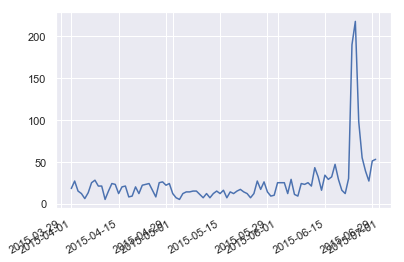

In [13]:
data['Date'].value_counts().plot()

#### grouping number of complaints wrt month

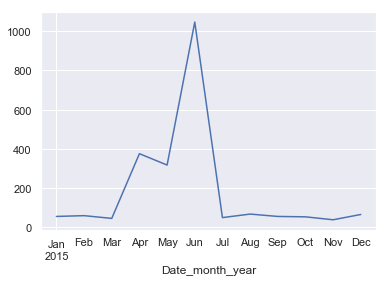

In [14]:
months= data.groupby(pd.Grouper(freq="M")).size().plot()

#### viewing customer complaints based on categories

In [15]:
data['Customer Complaint'].value_counts(dropna=False)[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Data Caps           11
Comcast Billing             11
Data Caps                   11
Unfair Billing Practices     9
Comcast data caps            8
Name: Customer Complaint, dtype: int64

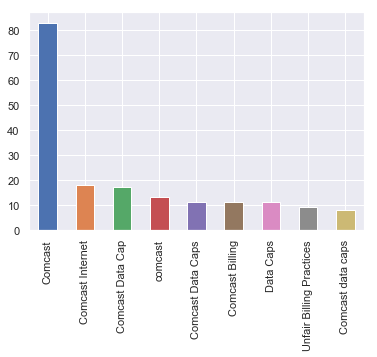

In [16]:
data['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

#### assigning pending to open and solved to close

In [17]:
data["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]
data.drop(['Status'],axis=1)

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,2015-04-01,Customer Care Call,Atlanta,Georgia,30312,No,Closed
2015-01-04,Comcast refusal of service,2015-04-01,Customer Care Call,Wayne,Pennsylvania,19087,No,Closed
2015-01-04,Comcast Cable,2015-04-01,Internet,Franklin,Tennessee,37067,No,Closed
2015-01-04,Data Overages,2015-04-01,Internet,Savannah,Georgia,31406,No,Closed
2015-01-04,Comcast,2015-04-01,Internet,North Huntingdon,Pennsylvania,15642,No,Closed
2015-01-04,Comcast harassment,2015-04-01,Customer Care Call,Schaumburg,Illinois,60193,No,Closed
2015-01-04,Comcast is ignoring me now. They are making NO...,2015-04-01,Internet,Golden,Colorado,80401,No,Closed
2015-01-04,Unable to get in touch with anyone that has th...,2015-04-01,Customer Care Call,Huntsville,Alabama,35801,No,Closed
2015-01-04,Comcast Lied About Pricing And Installation,2015-04-01,Customer Care Call,Newark,California,94560,No,Closed


### grouping state in terms of number of open and closed cases

In [18]:
stack=data.groupby(['State','newStatus']).size().unstack().fillna(0)

In [19]:
stack.head()

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


### plotting open and closed complaints wrt each state

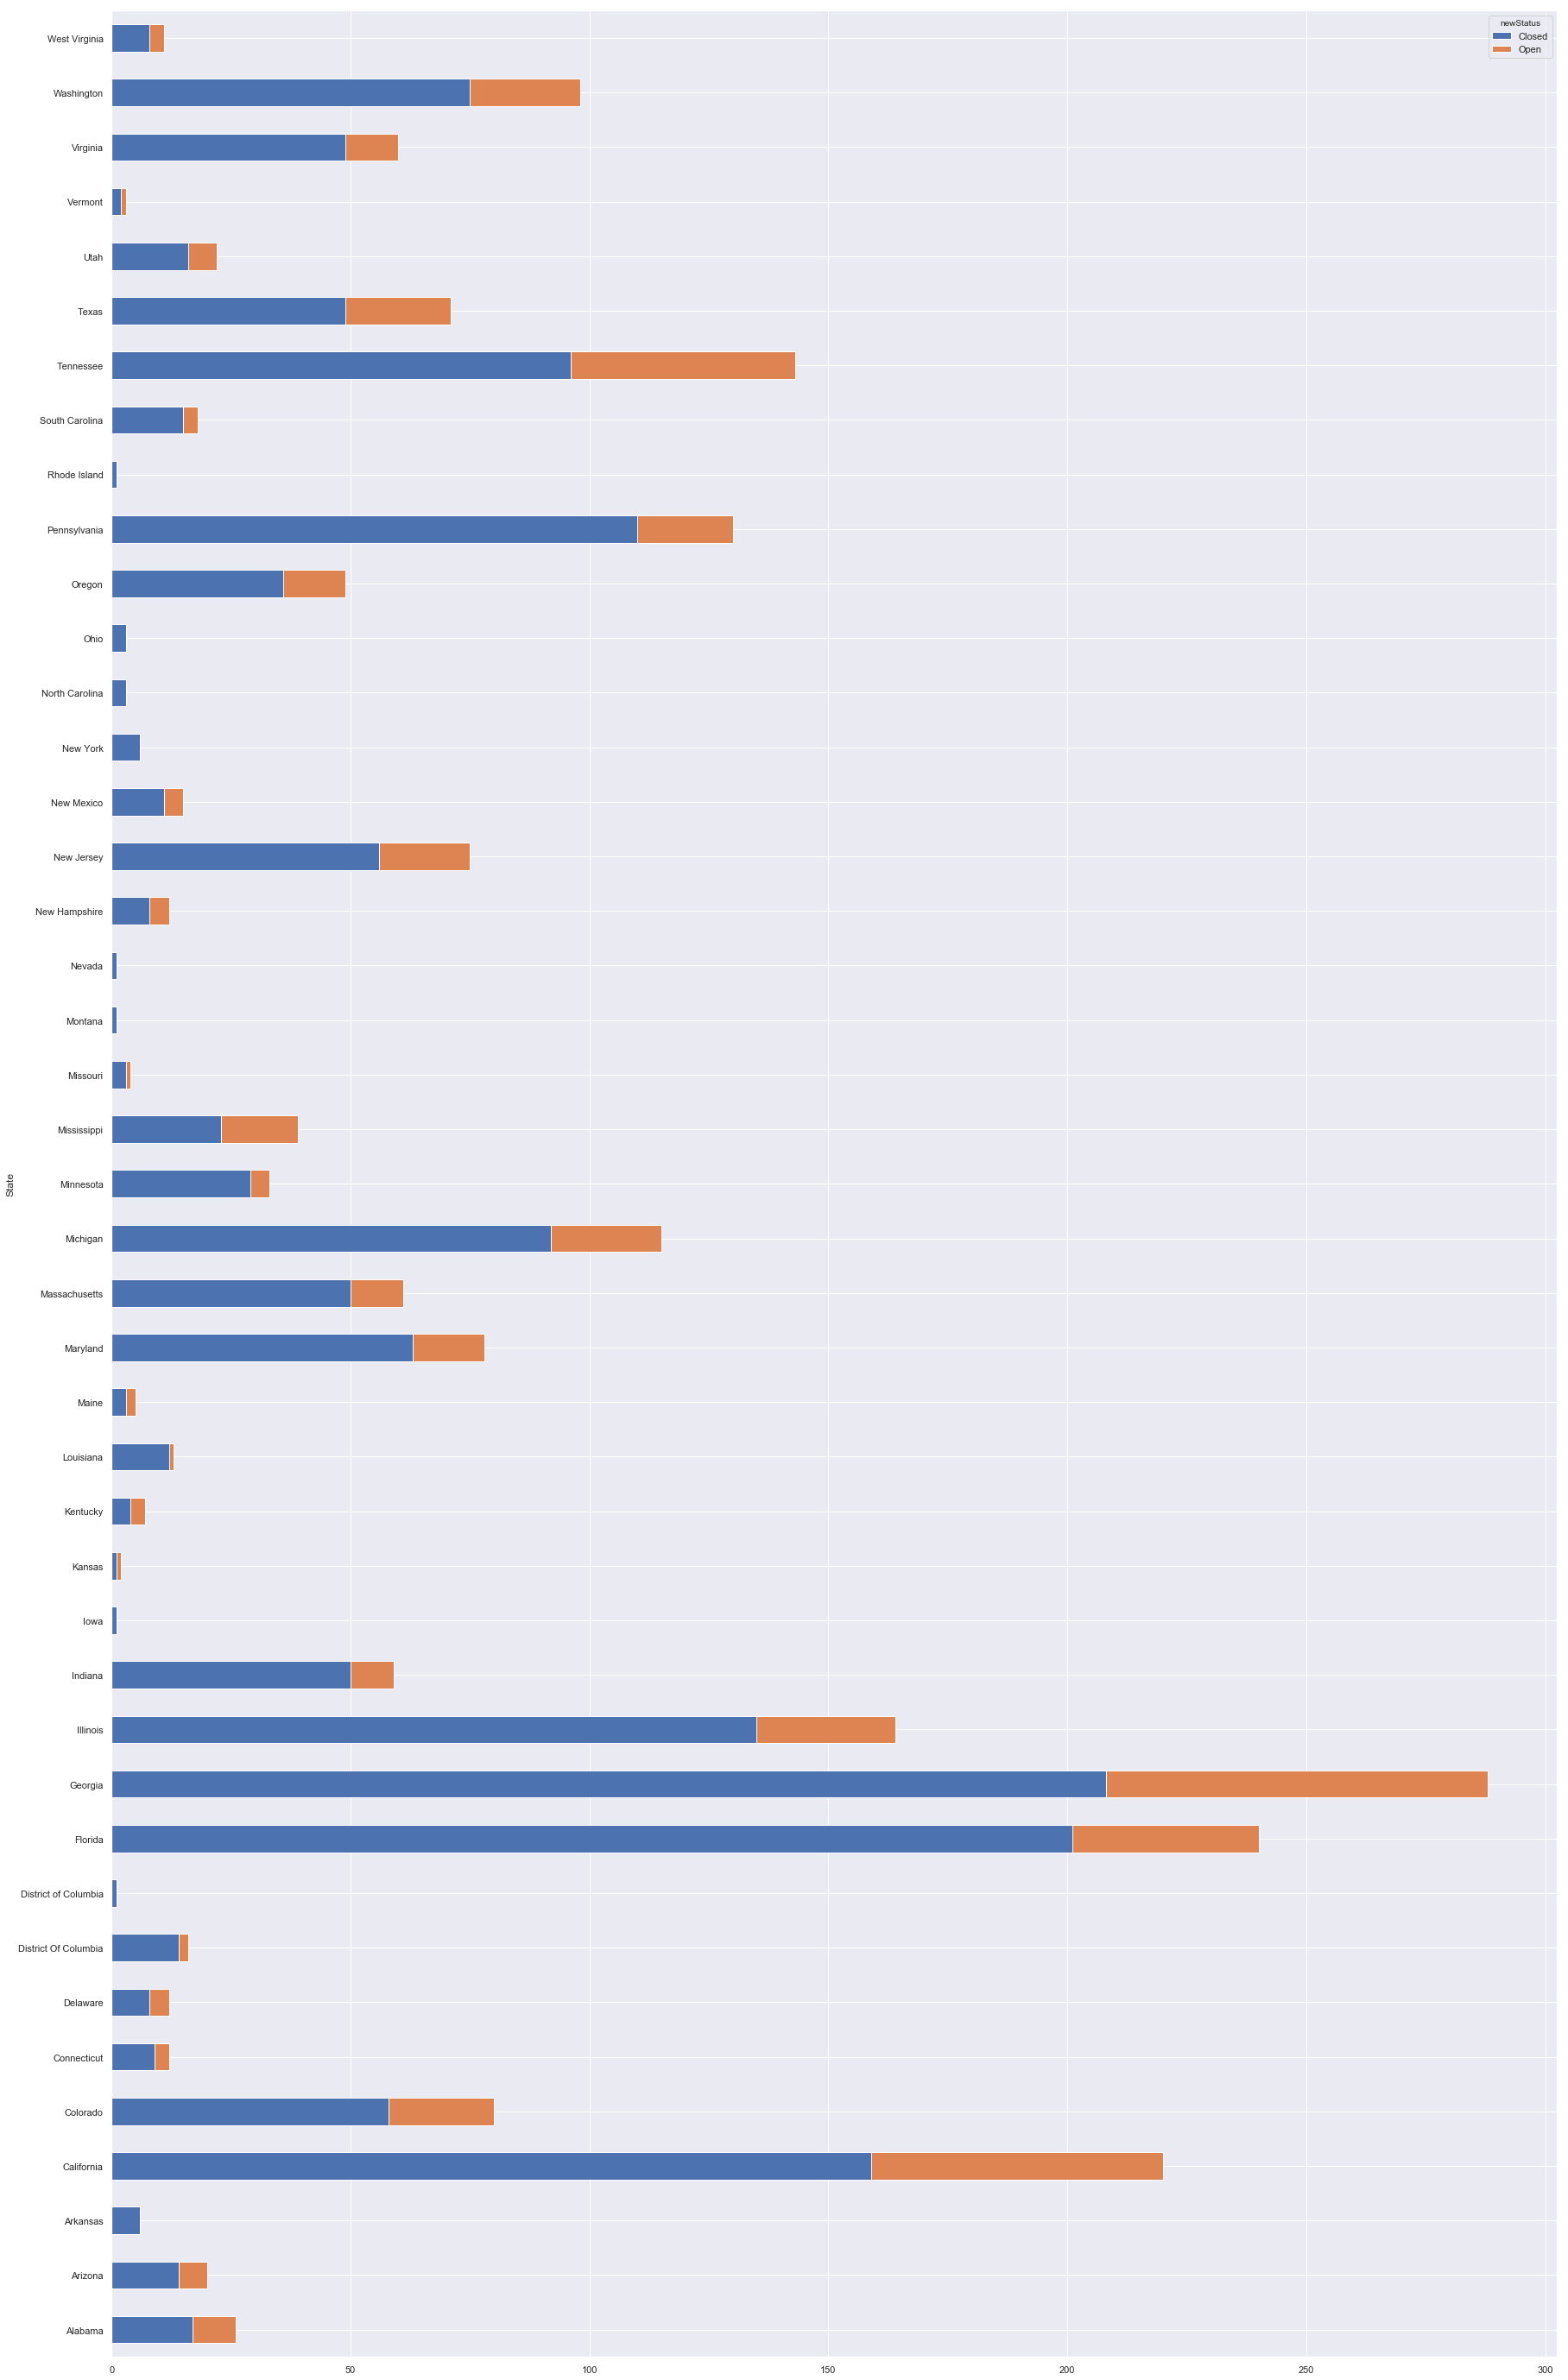

In [20]:
stack.plot(kind='barh',stacked=True,figsize=(30,50))          # number of cases are stacked in terms of state

### finding the state with maximum number of complaints

In [24]:
max_complaints=data.groupby(['State']).size().sort_values(ascending=False).reset_index().rename({0:'counts'},axis=1)
max_complaints.head()

,State,counts
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [30]:
max_complaints['counts'].max()

288

In [31]:
max_complaints.loc[max_complaints['counts']==288]

,State,counts
0,Georgia,288


### each state with their respective pending percentage complaints

In [26]:
stack['% pending']= stack['Open']/(stack['Open']+stack['Closed'])
stack.head()

newStatus,Closed,Open,% pending
State,,,
Alabama,17.0,9.0,0.346154
Arizona,14.0,6.0,0.300000
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,0.277273
Colorado,58.0,22.0,0.275000


In [27]:
stack['% pending'].max(axis=0)

0.5

### state with maximum pending complaints percentage

In [28]:
stack.loc[stack['% pending'] == 0.5]

newStatus,Closed,Open,% pending
State,,,
Kansas,1.0,1.0,0.5
